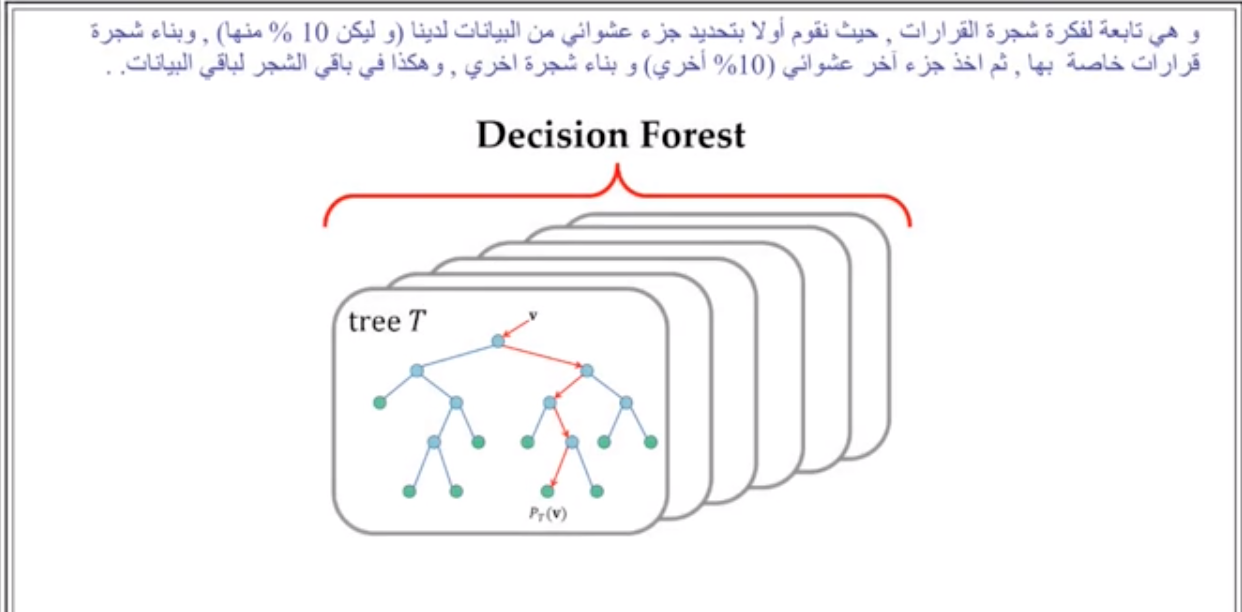

In [225]:
from IPython.display import Image
Image(filename='1.png')

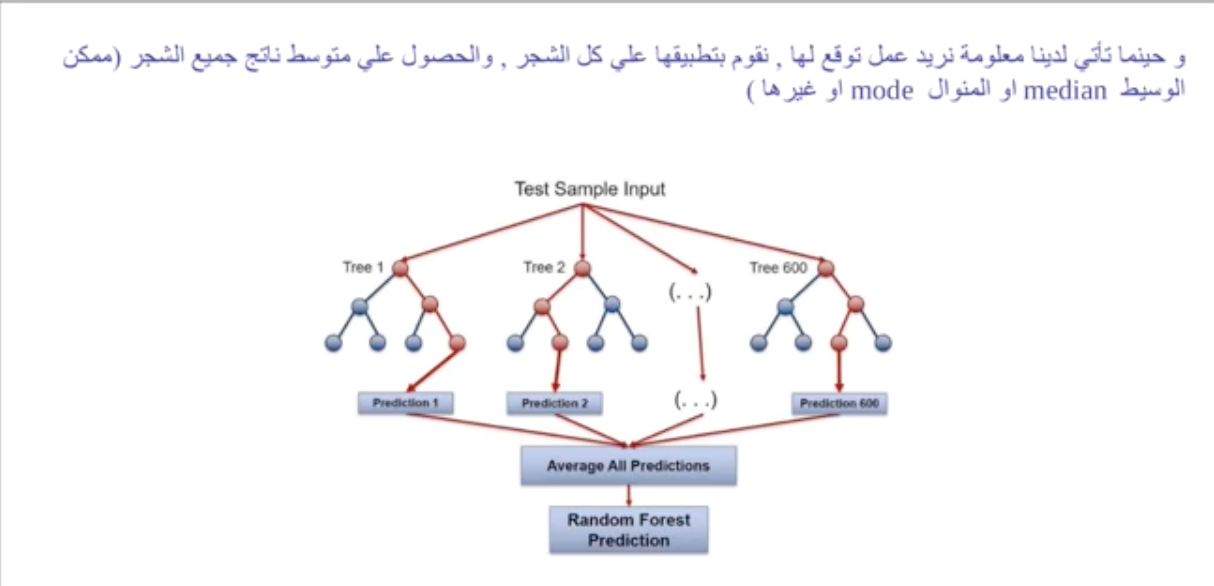

In [226]:
Image(filename='2.png')

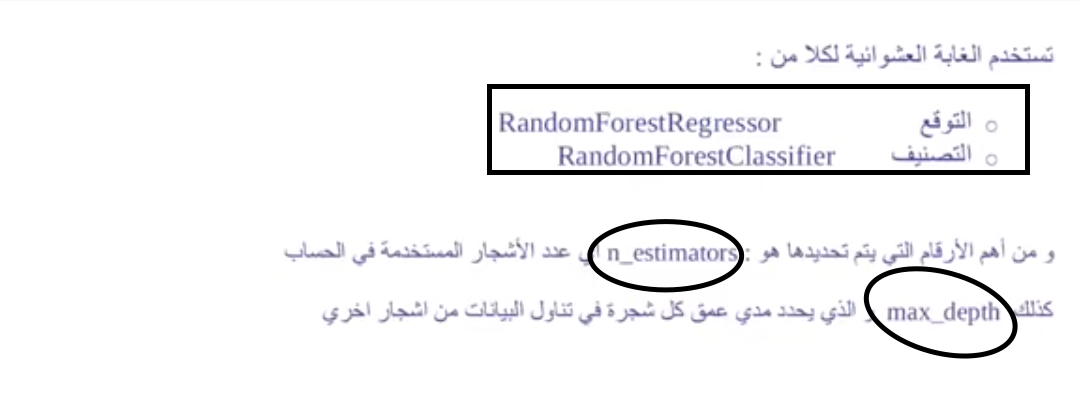

In [227]:
Image(filename='3.png')

# Ensemble Methods for `Regresstion`
* Collecting number of weak algorithms for reach good solution
* 1- `Ensemble Random Forest Regressor`
* 2- `Ensemble Gradient Boosting Regressor`

##  1- Ensemble Random Forest Regressor


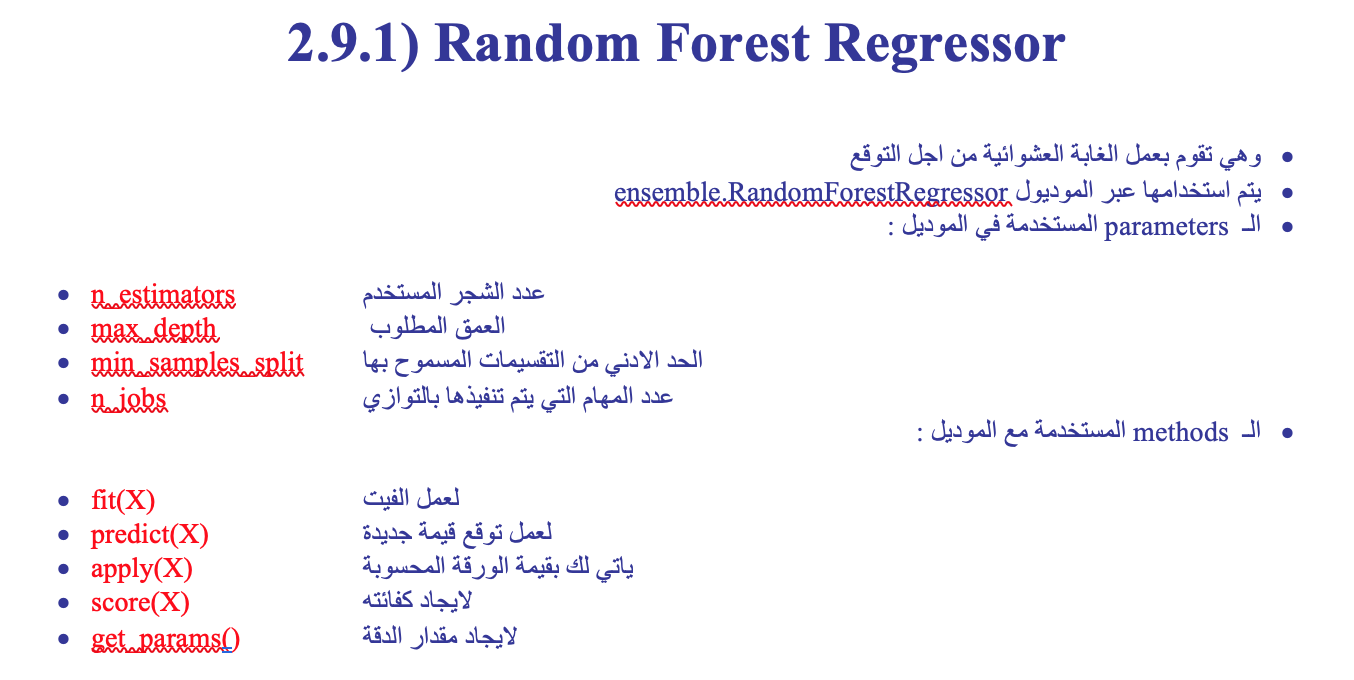

In [228]:
Image(filename='RFR.png')

In [229]:
#Applying Random Forest Regressor Model 

'''
sklearn.ensemble.RandomForestRegressor(n_estimators='warn', criterion=’mse’, max_depth=None,
                                       min_samples_split=2, min_samples_leaf=1,min_weight_fraction_leaf=0.0,
                                       max_features=’auto’, max_leaf_nodes=None,min_impurity_decrease=0.0,
                                       min_impurity_split=None, bootstrap=True,oob_score=False, n_jobs=None,
                                       random_state=None, verbose=0,warm_start=False)
'''


"\nsklearn.ensemble.RandomForestRegressor(n_estimators='warn', criterion=’mse’, max_depth=None,\n                                       min_samples_split=2, min_samples_leaf=1,min_weight_fraction_leaf=0.0,\n                                       max_features=’auto’, max_leaf_nodes=None,min_impurity_decrease=0.0,\n                                       min_impurity_split=None, bootstrap=True,oob_score=False, n_jobs=None,\n                                       random_state=None, verbose=0,warm_start=False)\n"

In [348]:
#Import Libraries
from sklearn.datasets import load_boston # regression
from sklearn.datasets import load_breast_cancer, load_iris # classification
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier


from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import median_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Example 1 for Boston data

In [231]:
#load boston data
data = load_boston()
X = data.data
y = data.target
print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [232]:
#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)


In [233]:
#Applying Random Forest Regressor Model 
RandomForestRegressorModel = RandomForestRegressor(n_estimators=100, max_depth=2, random_state=33)
RandomForestRegressorModel.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=33, verbose=0,
                      warm_start=False)

In [234]:
print('Random Forest Regressor Train Score is : ' , RandomForestRegressorModel.score(X_train, y_train))
print('Random Forest Regressor Test Score is : ' , RandomForestRegressorModel.score(X_test, y_test))
print('Random Forest Regressor No. of features are : ' , RandomForestRegressorModel.n_features_)


Random Forest Regressor Train Score is :  0.7745065255996815
Random Forest Regressor Test Score is :  0.7104782358952905
Random Forest Regressor No. of features are :  13


In [235]:
#Calculating Prediction
y_pred = RandomForestRegressorModel.predict(X_test)

In [236]:
# feature importance
RandomForestRegressorModel.feature_importances_

array([0.00592416, 0.        , 0.        , 0.        , 0.00642539,
       0.40975555, 0.00692973, 0.00146467, 0.        , 0.        ,
       0.00146166, 0.        , 0.56803885])

In [237]:
# ranking feature importance
importance = RandomForestRegressorModel.feature_importances_
indices = np.argsort(importance)[::-1]
# for f in range(X.shape[1]):
#     print("%d. feature %d is (%f)"%(f+1, indices[f], importance[indices[f]]))
# for f in range(X.shape[1]):
#     print('%d. feature %d (%f)'% (f+1, indices[f]), importance[indices[f]])
    
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))


1. feature 12 (0.167505)
2. feature 5 (0.036163)
3. feature 6 (0.006249)
4. feature 4 (0.078357)
5. feature 0 (0.004224)
6. feature 7 (0.017915)
7. feature 10 (0.029850)
8. feature 11 (0.012964)
9. feature 9 (0.022336)
10. feature 8 (0.023922)
11. feature 3 (0.009629)
12. feature 2 (0.383343)
13. feature 1 (0.008998)


In [238]:
#metrix evaluatoin
MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Absolute Error Value is : ', MAEValue)

#Calculating Mean Squared Error
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Squared Error Value is : ', MSEValue)

#Calculating Median Squared Error
MdSEValue = median_absolute_error(y_test, y_pred)
print('Median Squared Error Value is : ', MdSEValue )

Mean Absolute Error Value is :  3.77618642832205
Mean Squared Error Value is :  28.476735975693273
Median Squared Error Value is :  2.7180480374694973


### Example 2 for houses

In [239]:
data = pd.read_csv('houses.csv')
data.head()

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,price
0,3,1.00,1180,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,22.19
1,3,2.25,2570,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,53.80
2,2,1.00,770,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,18.00
3,4,3.00,1960,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,60.40
4,3,2.00,1680,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,51.00


In [240]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [241]:
print(X.shape)
print(y.shape)

(999, 15)
(999,)


In [242]:
# clearing data
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values= np.nan)
X = imp.fit_transform(X)


In [243]:
#Splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [244]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [245]:
print('Random Forest Regressor Train Score is : ' , regressor.score(X_train, y_train))
print('Random Forest Regressor Test Score is : ' , regressor.score(X_test, y_test))


Random Forest Regressor Train Score is :  0.9675682701685075
Random Forest Regressor Test Score is :  0.8035631661803153


In [246]:
# Predicting a new result
y_pred = regressor.predict(X_test)


In [247]:
print('Feature importance for Random Forest Regressoin\n',regressor.feature_importances_)

Feature importance for Random Forest Regressoin
 [0.00422415 0.0089977  0.38334253 0.00962895 0.07835689 0.0361634
 0.00624886 0.01791455 0.02392157 0.02233618 0.02985007 0.01296367
 0.1675051  0.0309375  0.16760889]


In [248]:
print('Feature importance for Random Forest Regressoin\n',regressor.feature_importances_)

Feature importance for Random Forest Regressoin
 [0.00422415 0.0089977  0.38334253 0.00962895 0.07835689 0.0361634
 0.00624886 0.01791455 0.02392157 0.02233618 0.02985007 0.01296367
 0.1675051  0.0309375  0.16760889]


In [249]:
importances = regressor.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))


1. feature 2 (0.383343)
2. feature 14 (0.167609)
3. feature 12 (0.167505)
4. feature 4 (0.078357)
5. feature 5 (0.036163)
6. feature 13 (0.030937)
7. feature 10 (0.029850)
8. feature 8 (0.023922)
9. feature 9 (0.022336)
10. feature 7 (0.017915)
11. feature 11 (0.012964)
12. feature 3 (0.009629)
13. feature 1 (0.008998)
14. feature 6 (0.006249)
15. feature 0 (0.004224)


In [250]:
#metrix evaluatoin
MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Absolute Error Value is : ', MAEValue)

#Calculating Mean Squared Error
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Squared Error Value is : ', MSEValue)

#Calculating Median Squared Error
MdSEValue = median_absolute_error(y_test, y_pred)
print('Median Squared Error Value is : ', MdSEValue )

Mean Absolute Error Value is :  7.966667725829726
Mean Squared Error Value is :  188.4938338274464
Median Squared Error Value is :  4.746283000000005


### Example 3 

In [251]:
data = pd.read_csv('data.csv')
data.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [252]:
data = pd.get_dummies(data) 
#Pandas str.get_dummies() is used to separate each string in the caller series at the passed separator. 
#A data frame is returned with all the possible values after splitting every string. 
#If the text value in original data frame at same index contains the string (Column name/ Splited values) then the value at that position is 1 otherwise, 0.

data.head()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,46,46,46,41,0,0,0,0,0,1,0


In [253]:
y = np.array(data['actual'])
X = np.array(data.drop('actual', axis=1))

In [254]:
y

array([45, 44, 41, 40, 44, 51, 45, 48, 50, 52, 45, 49, 55, 49, 48, 54, 50,
       54, 48, 52, 52, 57, 48, 51, 54, 56, 57, 56, 52, 48, 47, 46, 51, 49,
       49, 53, 49, 51, 57, 62, 56, 55, 58, 55, 56, 57, 53, 51, 53, 51, 51,
       60, 59, 61, 60, 57, 53, 58, 55, 59, 57, 64, 60, 53, 54, 55, 56, 55,
       52, 54, 49, 51, 53, 58, 63, 61, 55, 56, 57, 53, 54, 57, 59, 51, 56,
       64, 68, 73, 71, 63, 69, 60, 57, 68, 77, 76, 66, 59, 58, 60, 59, 59,
       60, 68, 77, 89, 81, 81, 73, 64, 65, 55, 59, 60, 61, 64, 61, 68, 77,
       87, 74, 60, 68, 77, 82, 63, 67, 75, 81, 77, 82, 65, 57, 60, 71, 64,
       63, 66, 59, 66, 65, 66, 66, 65, 64, 64, 64, 71, 79, 75, 71, 80, 81,
       92, 86, 85, 67, 65, 67, 65, 70, 66, 60, 67, 71, 67, 65, 70, 76, 73,
       75, 68, 69, 71, 78, 85, 79, 74, 73, 76, 76, 71, 68, 69, 76, 68, 74,
       71, 74, 74, 77, 75, 77, 76, 72, 80, 73, 78, 82, 81, 71, 75, 80, 85,
       79, 83, 85, 88, 76, 73, 77, 73, 75, 80, 79, 72, 72, 73, 72, 76, 80,
       87, 90, 83, 84, 81

In [255]:
X

array([[2.016e+03, 1.000e+00, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.016e+03, 1.000e+00, 2.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.016e+03, 1.000e+00, 3.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [2.016e+03, 1.200e+01, 2.900e+01, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [2.016e+03, 1.200e+01, 3.000e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.016e+03, 1.200e+01, 3.100e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [256]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [257]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)


In [258]:
errors = abs(predictions - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Mean Absolute Error: 3.87 degrees.
Accuracy: 93.92 %.


## 2- Gradient Boosting Regressor

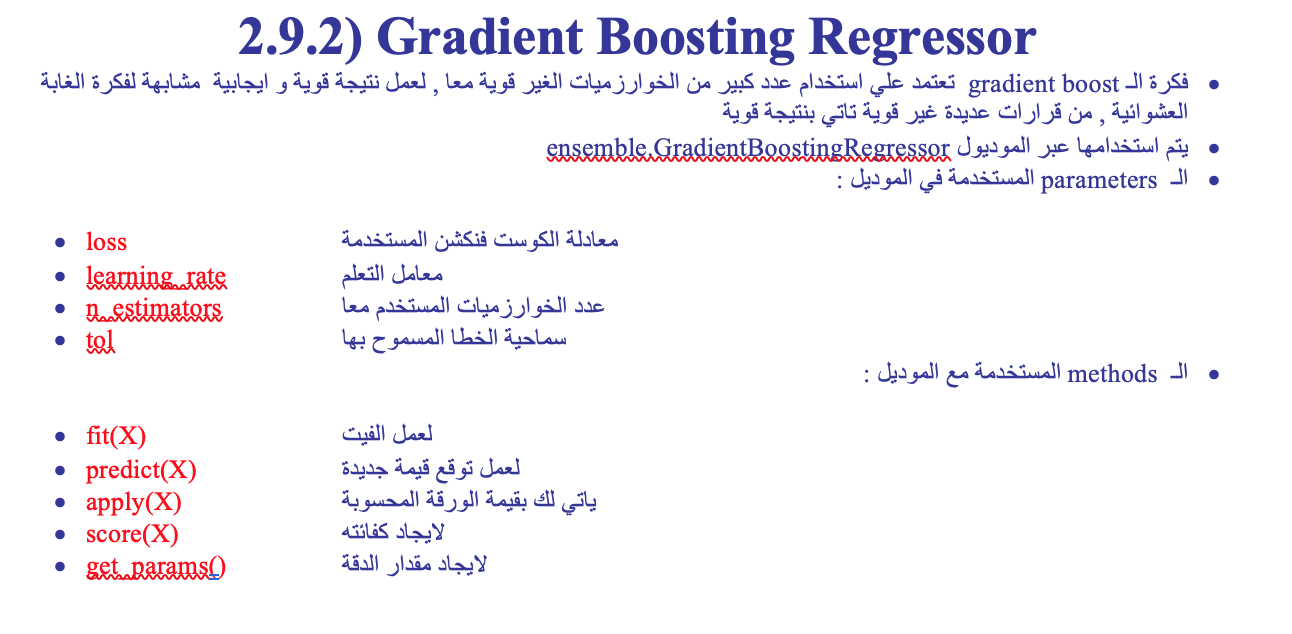

In [259]:
Image(filename='GBR.png')

In [260]:
#Applying Gradient Boosting Regressor Model 

'''
sklearn.ensemble.GradientBoostingRegressor(loss='ls’, learning_rate=0.1,n_estimators=100, subsample=
                                           1.0, criterion='friedman_mse’,min_samples_split=2,min_samples_leaf=1,
                                           min_weight_fraction_leaf=0.0,max_depth=3,min_impurity_decrease=0.0,
                                           min_impurity_split=None,init=None, random_state=None,max_features=None, alpha=0.9,
                                           verbose=0, max_leaf_nodes=None,warm_start=False, presort='auto'
                                           , validation_fraction=0.1,n_iter_no_change=None, tol=0.0001)
'''


"\nsklearn.ensemble.GradientBoostingRegressor(loss='ls’, learning_rate=0.1,n_estimators=100, subsample=\n                                           1.0, criterion='friedman_mse’,min_samples_split=2,min_samples_leaf=1,\n                                           min_weight_fraction_leaf=0.0,max_depth=3,min_impurity_decrease=0.0,\n                                           min_impurity_split=None,init=None, random_state=None,max_features=None, alpha=0.9,\n                                           verbose=0, max_leaf_nodes=None,warm_start=False, presort='auto'\n                                           , validation_fraction=0.1,n_iter_no_change=None, tol=0.0001)\n"

### Example 1

In [261]:
#load boston data
BostonData = load_boston()
X = BostonData.data
y = BostonData.target

In [262]:
#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)


In [263]:
#Applying Gradient Boosting Regressor Model 
GBRModel = GradientBoostingRegressor(n_estimators= 500, max_depth=4, learning_rate= .01)
GBRModel.fit(X_train, y_train)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [264]:
#Calculating Details
print('GBRModel Train Score is : ' , GBRModel.score(X_train, y_train))
print('GBRModel Test Score is : ' , GBRModel.score(X_test, y_test))


GBRModel Train Score is :  0.9850042277140229
GBRModel Test Score is :  0.8820643091913136


In [265]:
#Calculating Prediction
y_pred = GBRModel.predict(X_test)


In [266]:
# matrix evaluation
#Calculating Mean Absolute Error
MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Absolute Error Value is : ', MAEValue)

#----------------------------------------------------
#Calculating Mean Squared Error
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Squared Error Value is : ', MSEValue)

#----------------------------------------------------
#Calculating Median Squared Error
MdSEValue = median_absolute_error(y_test, y_pred)
print('Median Squared Error Value is : ', MdSEValue )

Mean Absolute Error Value is :  2.4576005283634874
Mean Squared Error Value is :  11.599900061590315
Median Squared Error Value is :  1.8299371555757915


### Example 2

In [267]:
features = pd.read_csv('data.csv')
features.head(5)


,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [268]:
print('The shape of our features is:', features.shape)


The shape of our features is: (348, 12)


In [269]:
features.describe()


,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


In [270]:
features = pd.get_dummies(features)
features.iloc[:,5:].head(5)

,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,46.0,44,46,46,46,41,0,0,0,0,0,1,0


In [271]:
import pandas as pd
features = pd.read_csv('data.csv')
features.head(5)

print('The shape of our features is:', features.shape)

features.describe()

features = pd.get_dummies(features)
features.iloc[:,5:].head(5)

import numpy as np
labels = np.array(features['actual'])

features= features.drop('actual', axis = 1)
feature_list = list(features.columns)
features = np.array(features)


from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)


print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

from sklearn.ensemble import  GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators = 100 , learning_rate = .1 , max_depth = 1)
model.fit(train_features, train_labels)


predictions = model.predict(test_features)
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

mape = 100 * (errors / test_labels)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')





The shape of our features is: (348, 12)
Training Features Shape: (261, 17)
Training Labels Shape: (261,)
Testing Features Shape: (87, 17)
Testing Labels Shape: (87,)
Mean Absolute Error: 3.71 degrees.
Accuracy: 94.16 %.


### Example 3

In [272]:
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor


In [273]:
X, y = make_friedman1(n_samples=1200, random_state=0, noise=1.0)
X_train = X[:1000]
X_test  = X[1000:]
y_train = y[:1000]
y_test  = y[1000:]


In [274]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(1000, 10)
(200, 10)
(1000,)
(200,)


In [275]:
est = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,max_depth=1, random_state=0, loss='ls').fit(X_train, y_train)
mean_squared_error(y_test, est.predict(X_test))

print(est.score(X_train,y_train))

y_pred = est.predict(X_test)


0.8388971340015943


In [276]:
for g in range(100,2000 , 100):
    est = GradientBoostingRegressor(n_estimators=g, learning_rate=0.1,max_depth=1, random_state=0, loss='ls').fit(X_train, y_train)
    score = est.score(X_test, y_test)
    y_pred = est.predict(X_test)
    print('MSE for ' , g , ' estimators is ' , mean_squared_error(y_test, y_pred))
    print('Score for ',g,' estimators is ',score)
    print('======================================')


MSE for  100  estimators is  3.9704301144293073
Score for  100  estimators is  0.8260697728702502
MSE for  200  estimators is  3.1310480143858914
Score for  200  estimators is  0.8628400761123668
MSE for  300  estimators is  3.0472083777974093
Score for  300  estimators is  0.8665127882906559
MSE for  400  estimators is  3.0669376691808656
Score for  400  estimators is  0.8656485191730703
MSE for  500  estimators is  3.1005370970357675
Score for  500  estimators is  0.8641766493882339
MSE for  600  estimators is  3.1519862410197192
Score for  600  estimators is  0.8619228479005212
MSE for  700  estimators is  3.183990957117735
Score for  700  estimators is  0.8605208366877005
MSE for  800  estimators is  3.2112326788064096
Score for  800  estimators is  0.8593274750860198
MSE for  900  estimators is  3.227260444645818
Score for  900  estimators is  0.8586253564559249
MSE for  1000  estimators is  3.2406016857804563
Score for  1000  estimators is  0.8580409247863414
MSE for  1100  estim

# Ensemble Methods for `Classification`
* Collecting number of weak algorithms for reach good solution
* 1- `Ensemble Random Forest Classifier`
* 2- `Ensemble Gradient Boosting Classifier`
* 3- `Voting Classifier`

# 1- Random Forest Classifier

In [277]:
#Applying RandomForestClassifier Model 

'''
ensemble.RandomForestClassifier(n_estimators='warn’, criterion=’gini’, max_depth=None,
                                min_samples_split=2, min_samples_leaf=1,min_weight_fraction_leaf=0.0,
                                max_features='auto’,max_leaf_nodes=None,min_impurity_decrease=0.0,
                                min_impurity_split=None, bootstrap=True,oob_score=False, n_jobs=None,
                                random_state=None, verbose=0,warm_start=False, class_weight=None)
'''


"\nensemble.RandomForestClassifier(n_estimators='warn’, criterion=’gini’, max_depth=None,\n                                min_samples_split=2, min_samples_leaf=1,min_weight_fraction_leaf=0.0,\n                                max_features='auto’,max_leaf_nodes=None,min_impurity_decrease=0.0,\n                                min_impurity_split=None, bootstrap=True,oob_score=False, n_jobs=None,\n                                random_state=None, verbose=0,warm_start=False, class_weight=None)\n"

### Example 1

In [278]:
#load breast cancer data
BreastData = load_breast_cancer()

#X Data
X = BreastData.data

#y Data
y = BreastData.target

#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)

RandomForestClassifierModel = RandomForestClassifier(criterion = 'gini',n_estimators=100,max_depth=2,random_state=33) #criterion can be also : entropy 
RandomForestClassifierModel.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=33, verbose=0,
                       warm_start=False)

In [279]:
#Calculating Details
print('RandomForestClassifierModel Train Score is : ' , RandomForestClassifierModel.score(X_train, y_train))
print('RandomForestClassifierModel Test Score is : ' , RandomForestClassifierModel.score(X_test, y_test))
print('RandomForestClassifierModel features importances are : ' , RandomForestClassifierModel.feature_importances_)


RandomForestClassifierModel Train Score is :  0.958005249343832
RandomForestClassifierModel Test Score is :  0.9414893617021277
RandomForestClassifierModel features importances are :  [0.0688497  0.00482055 0.03693695 0.06028174 0.         0.02063627
 0.07649224 0.10083921 0.0019788  0.00220208 0.01266482 0.00202552
 0.01018021 0.03155858 0.         0.         0.00074116 0.00395916
 0.00063729 0.         0.11028429 0.01343855 0.10876131 0.13039691
 0.00217522 0.01194414 0.04619133 0.13543683 0.00190664 0.00466048]


In [280]:
# ranking feature importance
feature_importance = RandomForestClassifierModel.feature_importances_
indices = np.argsort(feature_importance)[::-1]
for i in range(X.shape[1]):
    print('%d. feature num %d: (%f)'% (i+1, indices[i], feature_importance[indices[i]])) 


1. feature num 27: (0.135437)
2. feature num 23: (0.130397)
3. feature num 20: (0.110284)
4. feature num 22: (0.108761)
5. feature num 7: (0.100839)
6. feature num 6: (0.076492)
7. feature num 0: (0.068850)
8. feature num 3: (0.060282)
9. feature num 26: (0.046191)
10. feature num 2: (0.036937)
11. feature num 13: (0.031559)
12. feature num 5: (0.020636)
13. feature num 21: (0.013439)
14. feature num 10: (0.012665)
15. feature num 25: (0.011944)
16. feature num 12: (0.010180)
17. feature num 1: (0.004821)
18. feature num 29: (0.004660)
19. feature num 17: (0.003959)
20. feature num 9: (0.002202)
21. feature num 24: (0.002175)
22. feature num 11: (0.002026)
23. feature num 8: (0.001979)
24. feature num 28: (0.001907)
25. feature num 16: (0.000741)
26. feature num 18: (0.000637)
27. feature num 15: (0.000000)
28. feature num 4: (0.000000)
29. feature num 19: (0.000000)
30. feature num 14: (0.000000)


In [281]:
#Calculating Prediction
y_pred = RandomForestClassifierModel.predict(X_test)
y_pred_prob = RandomForestClassifierModel.predict_proba(X_test)
print('Prediction Probabilities Value for RandomForestClassifierModel is : \n' , y_pred_prob[:10])


Prediction Probabilities Value for RandomForestClassifierModel is : 
 [[0.78068598 0.21931402]
 [0.96238567 0.03761433]
 [0.03631092 0.96368908]
 [0.96238567 0.03761433]
 [0.24791842 0.75208158]
 [0.13894232 0.86105768]
 [0.02547802 0.97452198]
 [0.72341607 0.27658393]
 [0.94652031 0.05347969]
 [0.05115072 0.94884928]]


Confusion Matrix is : 
 [[ 64   4]
 [  7 113]]


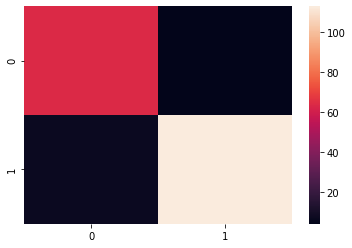

In [282]:
# Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM)


### Example 2

In [290]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [295]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
X.shape

(303, 13)

In [292]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [294]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X_train)
y = sc.transform(X_test)

In [302]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifierModel = RandomForestClassifier(n_estimators= 20, max_depth=3, random_state=0)

RandomForestClassifierModel.fit(X_train, y_train)


y_pred = RandomForestClassifierModel.predict(X_test)


In [304]:
#Calculating Details
print('RandomForestClassifierModel Train Score is : ' , RandomForestClassifierModel.score(X_train, y_train))
print('RandomForestClassifierModel Test Score is : ' , RandomForestClassifierModel.score(X_test, y_test))
print('RandomForestClassifierModel features importances are : ' , RandomForestClassifierModel.feature_importances_)


RandomForestClassifierModel Train Score is :  0.8854625550660793
RandomForestClassifierModel Test Score is :  0.8421052631578947
RandomForestClassifierModel features importances are :  [0.03473881 0.02181566 0.12801662 0.01044693 0.01744006 0.00575189
 0.00149498 0.06785069 0.11713809 0.17840233 0.07865349 0.16082978
 0.17742068]


[[25  4]
 [ 8 39]]


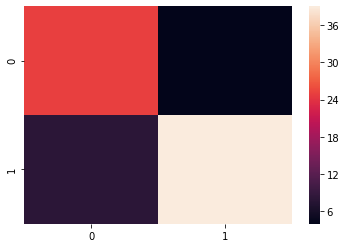

In [303]:
CM = confusion_matrix(y_pred, y_test)
print(CM)
sns.heatmap(CM)

In [305]:
for j in range(2,100,20):
   
    classifier = RandomForestClassifier(n_estimators = j, criterion = 'entropy')
    classifier.fit(X_train, y_train)
    
    y_pred = classifier.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    print('RF for number of Trees : ' , j , ' is : \n' , cm)
    print('The Score is : ',classifier.score(X_test , y_test))
    print('=======================================================')

RF for number of Trees :  2  is : 
 [[26  7]
 [16 27]]
The Score is :  0.6973684210526315
RF for number of Trees :  22  is : 
 [[25  8]
 [ 6 37]]
The Score is :  0.8157894736842105
RF for number of Trees :  42  is : 
 [[25  8]
 [ 5 38]]
The Score is :  0.8289473684210527
RF for number of Trees :  62  is : 
 [[26  7]
 [ 5 38]]
The Score is :  0.8421052631578947
RF for number of Trees :  82  is : 
 [[25  8]
 [ 6 37]]
The Score is :  0.8157894736842105


### Example 3

In [308]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

data = load_breast_cancer()
X = data.data
y = data.target

skf = StratifiedKFold(n_splits = 5  )
p_lg = np.zeros(y.shape[0])
p_rf = np.zeros(y.shape[0])

for train,test in skf.split(X,y):
    x_train = X[train]
    x_test = X[test]
    y_train = y[train]
    y_test = y[test]
    logreg = LogisticRegression()
    logreg.fit(x_train , y_train)
    result= logreg.predict(x_test)
    p_lg[test] = result
    
    rf = RandomForestClassifier(n_estimators = 1000 , n_jobs = -1)
    rf.fit(x_train , y_train)
    res_rf = rf.predict(x_test)
    p_rf[test] = res_rf
    

print('Log Reg ' , accuracy_score(y , p_lg))
print('Rand For' , accuracy_score(y , p_rf ))


/Users/fox/anaconda3/envs/newEnv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/fox/anaconda3/envs/newEnv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/fox/anaconda3/envs/newEnv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/fox/anaconda3/envs/newEnv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/fox/anaconda3/envs/newEnv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: Futur

Log Reg  0.9507908611599297
Rand For 0.961335676625659


# 2- Ensemble Gradient Boosting Classifier(GBC)

In [309]:
#Applying GradientBoostingClassifier Model 

'''
ensemble.GradientBoostingClassifier(loss='deviance’, learning_rate=0.1,n_estimators=100, subsample=1.0,
                                    criterion='friedman_mse’,min_samples_split=2,min_samples_leaf=1,
                                    min_weight_fraction_leaf=0.0,max_depth=3,min_impurity_decrease=0.0,
                                    min_impurity_split=None,init=None, random_state=None,max_features=None,
                                    verbose=0, max_leaf_nodes=None,warm_start=False, presort='auto’, 
                                    validation_fraction=0.1,n_iter_no_change=None, tol=0.0001)
'''


"\nensemble.GradientBoostingClassifier(loss='deviance’, learning_rate=0.1,n_estimators=100, subsample=1.0,\n                                    criterion='friedman_mse’,min_samples_split=2,min_samples_leaf=1,\n                                    min_weight_fraction_leaf=0.0,max_depth=3,min_impurity_decrease=0.0,\n                                    min_impurity_split=None,init=None, random_state=None,max_features=None,\n                                    verbose=0, max_leaf_nodes=None,warm_start=False, presort='auto’, \n                                    validation_fraction=0.1,n_iter_no_change=None, tol=0.0001)\n"

### Example 1

In [315]:
#load breast cancer data
BreastData = load_breast_cancer()

#X Data
X = BreastData.data

#y Data
y = BreastData.target

X.shape

(569, 30)

In [311]:
#Splitting data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)


In [314]:
GBCModel = GradientBoostingClassifier(n_estimators=100,max_depth=3,random_state=33) 
GBCModel.fit(X_train, y_train)

#Calculating Details
print('GBCModel Train Score is : ' , GBCModel.score(X_train, y_train))
print('GBCModel Test Score is : ' , GBCModel.score(X_test, y_test))
print('GBCModel features importances are : ' , GBCModel.feature_importances_)


GBCModel Train Score is :  1.0
GBCModel Test Score is :  0.9680851063829787
GBCModel features importances are :  [2.64421804e-03 1.94756253e-02 3.39868797e-04 7.40563827e-04
 1.28733761e-04 4.46059168e-05 4.19921033e-03 2.70126401e-01
 6.18715325e-03 1.22395707e-03 8.73419835e-03 1.24279513e-03
 5.38240337e-04 7.31119026e-03 1.25803146e-03 2.09678425e-04
 1.02287136e-03 1.43689637e-03 1.32369509e-03 2.25076485e-03
 1.12522712e-01 2.71364839e-02 3.43358697e-01 4.27390291e-02
 9.21956541e-03 9.40161405e-04 3.33455054e-02 9.96128883e-02
 6.77912509e-04 8.34631570e-06]


In [321]:
# ranking feature
feature = GBCModel.feature_importances_
indices = np.argsort(feature)[::-1]
for i in range(X.shape[1]):
    print('%d. feature num %d :(%f)'%(i+1, indices[i], feature[indices[i]]))

1. feature num 22 :(0.343359)
2. feature num 7 :(0.270126)
3. feature num 20 :(0.112523)
4. feature num 27 :(0.099613)
5. feature num 23 :(0.042739)
6. feature num 26 :(0.033346)
7. feature num 21 :(0.027136)
8. feature num 1 :(0.019476)
9. feature num 24 :(0.009220)
10. feature num 10 :(0.008734)
11. feature num 13 :(0.007311)
12. feature num 8 :(0.006187)
13. feature num 6 :(0.004199)
14. feature num 0 :(0.002644)
15. feature num 19 :(0.002251)
16. feature num 17 :(0.001437)
17. feature num 18 :(0.001324)
18. feature num 14 :(0.001258)
19. feature num 11 :(0.001243)
20. feature num 9 :(0.001224)
21. feature num 16 :(0.001023)
22. feature num 25 :(0.000940)
23. feature num 3 :(0.000741)
24. feature num 28 :(0.000678)
25. feature num 12 :(0.000538)
26. feature num 2 :(0.000340)
27. feature num 15 :(0.000210)
28. feature num 4 :(0.000129)
29. feature num 5 :(0.000045)
30. feature num 29 :(0.000008)


In [322]:
#Calculating Prediction
y_pred = GBCModel.predict(X_test)
y_pred_prob = GBCModel.predict_proba(X_test)
print('Prediction Probabilities Value for GBCModel is : ' , y_pred_prob[:10])


Prediction Probabilities Value for GBCModel is :  [[9.95066925e-01 4.93307510e-03]
 [9.99656526e-01 3.43473897e-04]
 [9.20472385e-04 9.99079528e-01]
 [9.99636685e-01 3.63315335e-04]
 [9.57785922e-03 9.90422141e-01]
 [4.57779060e-03 9.95422209e-01]
 [3.33737404e-04 9.99666263e-01]
 [6.78660480e-01 3.21339520e-01]
 [9.99618160e-01 3.81839631e-04]
 [3.66898774e-04 9.99633101e-01]]


Confusion Matrix is : 
 [[ 66   2]
 [  4 116]]


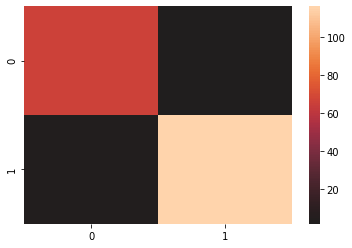

In [323]:
#Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, center = True)
plt.show()

### Example 2

In [325]:
from sklearn.datasets import make_hastie_10_2

In [326]:
X, y = make_hastie_10_2(random_state=0)
print(X.shape)
X_train = X[:2000]
X_test  = X[2000:]
y_train = y[:2000]
y_test  = y[2000:]


(12000, 10)


In [331]:
clf = GradientBoostingClassifier(n_estimators=1000, learning_rate=1.0,max_depth=1, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
clf.score(X_test, y_test)

0.9486

In [328]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[4849,  200],
       [ 314, 4637]])

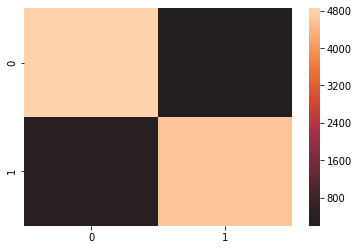

In [329]:
sns.heatmap(cm, center=True)


In [330]:
for g in range(100,1100 , 100):
    clf = GradientBoostingClassifier(n_estimators=g, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, y_train)
    clf.score(X_test, y_test)
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print('CM for ' , g , ' estimators is \n' , cm)
    print('Score for ' , g , ' estimators is ' , clf.score(X_test, y_test))    
    print('======================================')


CM for  100  estimators is 
 [[4657  392]
 [ 478 4473]]
Score for  100  estimators is  0.913
CM for  200  estimators is 
 [[4747  302]
 [ 393 4558]]
Score for  200  estimators is  0.9305
CM for  300  estimators is 
 [[4785  264]
 [ 330 4621]]
Score for  300  estimators is  0.9406
CM for  400  estimators is 
 [[4806  243]
 [ 323 4628]]
Score for  400  estimators is  0.9434
CM for  500  estimators is 
 [[4830  219]
 [ 329 4622]]
Score for  500  estimators is  0.9452
CM for  600  estimators is 
 [[4830  219]
 [ 323 4628]]
Score for  600  estimators is  0.9458
CM for  700  estimators is 
 [[4830  219]
 [ 304 4647]]
Score for  700  estimators is  0.9477
CM for  800  estimators is 
 [[4843  206]
 [ 305 4646]]
Score for  800  estimators is  0.9489
CM for  900  estimators is 
 [[4846  203]
 [ 314 4637]]
Score for  900  estimators is  0.9483
CM for  1000  estimators is 
 [[4849  200]
 [ 314 4637]]
Score for  1000  estimators is  0.9486


### Example 3

In [333]:
data = load_breast_cancer()
X = data.data
y = data.target

skf = StratifiedKFold(n_splits = 5  )
p_rf = np.zeros(y.shape[0])


for n in range(10,100,10):
    for train,test in skf.split(X,y):
        x_train = X[train]
        x_test = X[test]
        y_train = y[train]
        y_test = y[test]
        
        clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
#         cm = confusion_matrix(y_test, y_pred)
#         print(cm)

    print('score For' ,n , '   '  ,  accuracy_score(y_test , y_pred))





score For 10     0.9734513274336283
score For 20     0.9734513274336283
score For 30     0.9734513274336283
score For 40     0.9734513274336283
score For 50     0.9734513274336283
score For 60     0.9734513274336283
score For 70     0.9734513274336283
score For 80     0.9734513274336283
score For 90     0.9734513274336283


# 3- Votting Classifier
* importing number of calssifier models and votting with them

In [335]:
#Applying VotingClassifier Model 

'''
ensemble.VotingClassifier(estimators, voting=’hard’, weights=None,n_jobs=None, flatten_transform=None)
'''


'\nensemble.VotingClassifier(estimators, voting=’hard’, weights=None,n_jobs=None, flatten_transform=None)\n'

### Example 1

In [336]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier 


In [337]:
#load breast cancer data
BreastData = load_breast_cancer()

#X Data
X = BreastData.data

#y Data
y = BreastData.target


In [338]:
#Splitting data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)


In [340]:
#loading models for Voting Classifier
DTModel_ = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=33)
LDAModel_ = LinearDiscriminantAnalysis(n_components=3 ,solver='svd')
SGDModel_ = SGDClassifier(loss='log', penalty='l2', max_iter=10000, tol=1e-5)


In [342]:
#loading Voting Classifier
VotingClassifierModel = VotingClassifier(estimators=
    [
    ('DTModel',DTModel_),
    ('LDAModel',LDAModel_),
    ('SGDModel',SGDModel_)
    ], voting='hard')
VotingClassifierModel.fit(X_train, y_train)


/Users/fox/anaconda3/envs/newEnv/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(30, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/Users/fox/anaconda3/envs/newEnv/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


VotingClassifier(estimators=[('DTModel',
                              DecisionTreeClassifier(class_weight=None,
                                                     criterion='entropy',
                                                     max_depth=3,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort=False,
                                                     random_state=33,
                                                     splitter='best')),
   

In [343]:
#Calculating Details
print('VotingClassifierModel Train Score is : ' , VotingClassifierModel.score(X_train, y_train))
print('VotingClassifierModel Test Score is : ' , VotingClassifierModel.score(X_test, y_test))


VotingClassifierModel Train Score is :  0.9606299212598425
VotingClassifierModel Test Score is :  0.9521276595744681


In [344]:
#Calculating Prediction
y_pred = VotingClassifierModel.predict(X_test)


Confusion Matrix is : 
 [[ 60   8]
 [  1 119]]


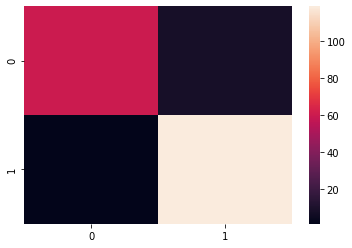

In [345]:
#Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM)


### Example 2

In [358]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

iris = load_iris()
X = iris.data[:, 1:3]
y = iris.target

clf1 = LogisticRegression(solver='lbfgs', multi_class='multinomial',random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

eclf = VotingClassifier(estimators=
                        [('lr', clf1),
                         ('rf', clf2), 
                         ('gnb', clf3)
                        ],voting='hard')


    
for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest ', 'naive Bayes ', 'Ensemble ']): 
    scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f [%s]" % (scores.mean(), label))


Accuracy: 0.95 [Logistic Regression]
Accuracy: 0.94 [Random Forest ]
Accuracy: 0.91 [naive Bayes ]
Accuracy: 0.95 [Ensemble ]
